In [25]:
import kagglehub
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression , Lasso , Ridge , LogisticRegression
from sklearn.metrics import classification_report , mean_squared_error , r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

path = kagglehub.dataset_download("nelgiriyewithana/new-york-housing-market")
csv_path = os.path.join(path, "NY-House-Dataset.csv")
data = pd.read_csv(csv_path)


In [26]:
X = data.drop('PRICE', axis = 1)
y = data['PRICE']

numerical_features = ['BEDS','BATH', 'LATITUDE', 'LONGITUDE']
categorical_features = ['TYPE','ADDRESS', 'STATE', 'MAIN_ADDRESS','ADMINISTRATIVE_AREA_LEVEL_2','LOCALITY','SUBLOCALITY' ,'STREET_NAME' ,'LONG_NAME','FORMATTED_ADDRESS']

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [27]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
]) 
preprocessing = ColumnTransformer([
    ('num', num_pipeline ,numerical_features ),
    ('cat', cat_pipeline , categorical_features )
])

In [30]:
clf = Pipeline([
    ('preprocessing', preprocessing ),
    ('linear', Ridge())
])

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [31]:
param_grid = {'linear__alpha': [0.1 ,1 ,10]}
grid = GridSearchCV(clf , param_grid , cv=5 , scoring='r2')
grid.fit(X_train ,y_train)

,estimator,"Pipeline(step...r', Ridge())])"
,param_grid,"{'linear__alpha': [0.1, 1, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


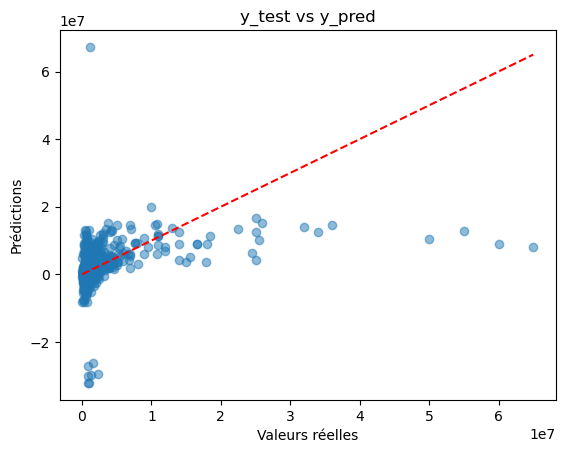

In [34]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # ligne rouge en pointillés
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("y_test vs y_pred")
plt.show()

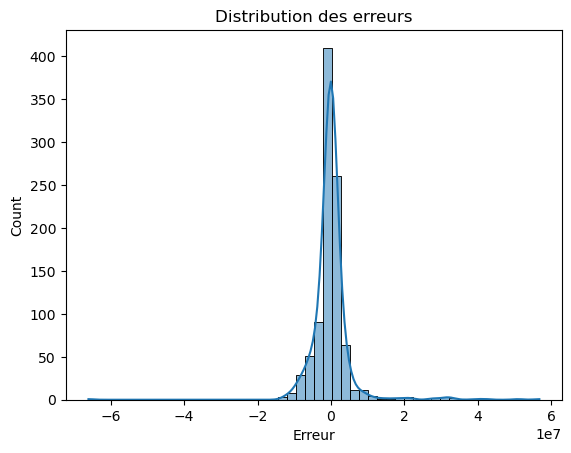

In [35]:
errors = y_test - y_pred
sns.histplot(errors, bins=50, kde=True)
plt.xlabel("Erreur")
plt.title("Distribution des erreurs")
plt.show()